# from allcools page: https://lhqing.github.io/ALLCools/cell_level/step_by_step/100kb/06-Clustering.html
Consensus Clustering
Purpose¶
The purpose of this step is to run consensus clustering.

Input
Cell-by-components matrix from the decompusition analysis.

Output
Adata file with cluster annotated.

In [1]:
import anndata
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

from ALLCools.clustering import ConsensusClustering, Dendrogram, get_pc_centers
from ALLCools.plot import *
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['savefig.transparent'] = True
matplotlib.rcParams['path.simplify'] = False  # keep exact vectors

In [2]:
# clustering name
clustering_name = 'L1'

# input data
cell_meta_path = '../../CellMetadata_PassQC_alloocytes_withyear_mtreads_sub.csv'
adata_path = './adata.with_coords.h5ad'
coord_base = 'umap'
var_dim = "chrom100k"
# ConsensusClustering
# Important factores
n_neighbors = 25
leiden_resolution = 0.5
# this parameter is the final target that limit the total number of clusters
# Higher accuracy means more conservative clustering results and less number of clusters
target_accuracy = 0.95
min_cluster_size = 20

# Other ConsensusClustering parameters
metric = 'euclidean'
consensus_rate = 0.7
leiden_repeats = 500
random_state = 0
train_frac = 0.5
train_max_n = 500
max_iter = 50
n_jobs = 40

# Dendrogram via Multiscale Bootstrap Resampling
nboot = 10000
method_dist = 'correlation'
method_hclust = 'average'

plot_type = 'static'

In [3]:
cell_meta_path = '../../CellMetadata_PassQC_alloocytes_withyear_mtreads_sub.csv'
cell_meta = pd.read_csv(cell_meta_path, index_col=0, sep="\t")

cell_meta = cell_meta[cell_meta["Type"] == "PO"]
cell_meta

,SampleI,AnimalID,Date,Animdate,Collection,Year,Type.of.sample,WellID,WellBarcode,Type,TotalRead,mCGFrac,Group,SampleName,Path,Bamfile,Total.Reads,Mitochondrial.Reads,MT.Fraction,MT.Percentage
SampleID,,,,,,,,,,,,,,,,,,,,
4146045001PO3NC4G4C,4146045001PO3NC4G4,41460,45001,f2,2,2023,Pooled Oocytes (4) #3,G4,TCGTGCAT,PO,2200000,0.689,Control,4146045001PO3NC4G4C_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,41460_45001_PO3_NC4_G4_1_val_1_bismark_bt2_pe....,2535512,8738,NaN,NaN
4129944963PO2NC4M1S,4129944963PO2NC4M1,41299,44963,d2,1,2023,Pooled Oocytes (4) #2,M1,CACGCAAT,PO,2300000,0.684,Stressed,4129944963PO2NC4M1S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,41299_44963_PO2_NC4_M1_1_val_1_bismark_bt2_pe....,2270808,38790,NaN,NaN
4520844650PO1NC5A7S,4520844650PO1NC5A7,45208,44650,n1,1,2022,Pooled Oocytes (5) #1,A7,ATCGTCTC,PO,2400000,0.676,Stressed,4520844650PO1NC5A7S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,45208_44650_PO1_NC5_A7_1_val_1_bismark_bt2_pe....,2821858,11608,NaN,NaN
4146045001PO2NC3F4C,4146045001PO2NC3F4,41460,45001,f2,2,2023,Pooled Oocytes (3) #2,F4,CTGAACGT,PO,2500000,0.686,Control,4146045001PO2NC3F4C_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,41460_45001_PO2_NC3_F4_1_val_1_bismark_bt2_pe....,2635056,48304,NaN,NaN
4520844650PO2NC3B7S,4520844650PO2NC3B7,45208,44650,n1,1,2022,Pooled Oocytes (3) #2,B7,CTCTGGAT,PO,2600000,0.680,Stressed,4520844650PO2NC3B7S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,45208_44650_PO2_NC3_B7_1_val_1_bismark_bt2_pe....,2957798,7806,NaN,NaN
3905345005PO1NC2I1S,3905345005PO1NC2I1,39053,45005,b1,1,2023,Pooled Oocytes (2) #1,I1,TGATAGGC,PO,2700000,0.623,Stressed,3905345005PO1NC2I1S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,39053_45005_PO1_NC2_I1_1_val_1_bismark_bt2_pe....,2784702,20544,NaN,NaN
4129944963PO1NC3N1S,4129944963PO1NC3N1,41299,44963,d2,2,2023,Pooled Oocytes (3) #1,N1,ATTCCGCT,PO,2900000,0.626,Stressed,4129944963PO1NC3N1S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,41299_44963_PO1_NC3_N1_1_val_1_bismark_bt2_pe....,2278410,121886,NaN,NaN
4211144957PO1NC3K4C,4211144957PO1NC3K4,42111,44957,g1,1,2023,Pooled Oocytes (3) #1,K4,ACTGGTGT,PO,3200000,0.674,Control,4211144957PO1NC3K4C_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,42111_44957_PO1_NC3_K4_1_val_1_bismark_bt2_pe....,3039304,77312,NaN,NaN
4660644938PO2NC3A10C,4660644938PO2NC3A1,46606,44938,r1,1,2023,Pooled Oocytes (3) #2,A10,GATCTTGC,PO,3600000,0.680,Control,4660644938PO2NC3A10C_1_val_1_bismark_bt2_pe.al...,/share/lasallelab/Ensi/project/allcools/allc_P...,46606_44938_PO2_NC3_A10_1_val_1_bismark_bt2_pe...,3742728,50728,NaN,NaN


In [4]:
adata = anndata.read_h5ad(adata_path)
adata.obs["Type"] = cell_meta["Type"]
adata = adata[adata.obs["Type"] == "PO"]
adata

View of AnnData object with n_obs × n_vars = 46 × 23803
    obs: 'leiden', 'mCGFrac', 'TotalRead', 'Group', 'MT.Fraction', 'Collection', 'Year', 'Type'
    var: 'chrom', 'end', 'start', 'CHN_mean', 'CHN_dispersion', 'CHN_cov', 'CHN_score', 'CHN_feature_select', 'CGN_mean', 'CGN_dispersion', 'CGN_cov', 'CGN_score', 'CGN_feature_select', 'leiden_enriched_features'
    uns: 'leiden', 'leiden_colors', 'leiden_feature_enrichment', 'leiden_sizes', 'log', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
#adding metadata to adata (removing mCGFrac from cell meta as it was already in adata)
#cell_meta = cell_meta.drop(columns=['mCGFrac'])
#adata.obs = adata.obs.join(cell_meta, how="left")
#adata.obs["MT.Fraction"] = cell_meta["MT.Fraction"]
adata 

View of AnnData object with n_obs × n_vars = 46 × 23803
    obs: 'leiden', 'mCGFrac', 'TotalRead', 'Group', 'MT.Fraction', 'Collection', 'Year', 'Type'
    var: 'chrom', 'end', 'start', 'CHN_mean', 'CHN_dispersion', 'CHN_cov', 'CHN_score', 'CHN_feature_select', 'CGN_mean', 'CGN_dispersion', 'CGN_cov', 'CGN_score', 'CGN_feature_select', 'leiden_enriched_features'
    uns: 'leiden', 'leiden_colors', 'leiden_feature_enrichment', 'leiden_sizes', 'log', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [6]:
#CONSENSUSE CLUSTERING:

cc = ConsensusClustering(model=None,
                         n_neighbors=n_neighbors,
                         metric=metric,
                         min_cluster_size=min_cluster_size,
                         leiden_repeats=leiden_repeats,
                         leiden_resolution=leiden_resolution,
                         consensus_rate=consensus_rate,
                         random_state=random_state,
                         train_frac=train_frac,
                         train_max_n=train_max_n,
                         max_iter=max_iter,
                         n_jobs=n_jobs,
                         target_accuracy=target_accuracy)

In [7]:
import numpy as np

# Original X_pca
X_pca = adata.obsm['X_pca']


# Use X_pca_for_clustering in clustering instead of adata.obsm['X_pca']
cc.fit_predict(X_pca)



Computing nearest neighbor graph
Computing multiple clustering with different random seeds
Repeating leiden clustering 500 times
Found 2 - 3 clusters, mean 3.0, std 0.20
Summarizing multiple clustering results
21 cells assigned to 1 raw clusters
25 cells are multi-leiden outliers
There is only one cluster except for outliers, can not train supervise model on that.

=== Assign final labels ===
Skip final evaluation because only 1 cluster label exist.


In [8]:
print(dir(cc))

['X', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_create_model', '_label_with_leiden_outliers', '_multi_leiden_clusters', '_neighbors', '_summarize_multi_leiden', 'add_data', 'compute_neighbors', 'consensus_rate', 'cv_predicted_label', 'final_accuracy', 'final_evaluation', 'fit_predict', 'knn_metric', 'label', 'label_proba', 'leiden_repeats', 'leiden_resolution', 'leiden_result_df', 'max_iter', 'min_cluster_size', 'multi_leiden_clustering', 'n_jobs', 'n_neighbors', 'n_obs', 'n_pcs', 'plot_before_after', 'plot_leiden_cases', 'plot_merge_process', 'plot_steps', 'random_state', 'save', 'step_data', 'supervise_learning', 'supervise_model', 'target_accuracy', 'train_frac', 'train_max_n']


In [9]:
cc.plot_merge_process(plot_size=3)

No merge step to plot


In [10]:

# Plot merge process and save

plt.savefig(f"05j_cc_mergeprocess_plot_{var_dim}.png")


<Figure size 640x480 with 0 Axes>

In [11]:

# Plot ConsensusClustering Details - Individual Leiden runs with diffreent random states 
adata.obs[f'{coord_base}_0'] = adata.obsm[f'X_{coord_base}'][:, 0]
adata.obs[f'{coord_base}_1'] = adata.obsm[f'X_{coord_base}'][:, 1]


/tmp/ipykernel_2277392/193914729.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'{coord_base}_0'] = adata.obsm[f'X_{coord_base}'][:, 0]


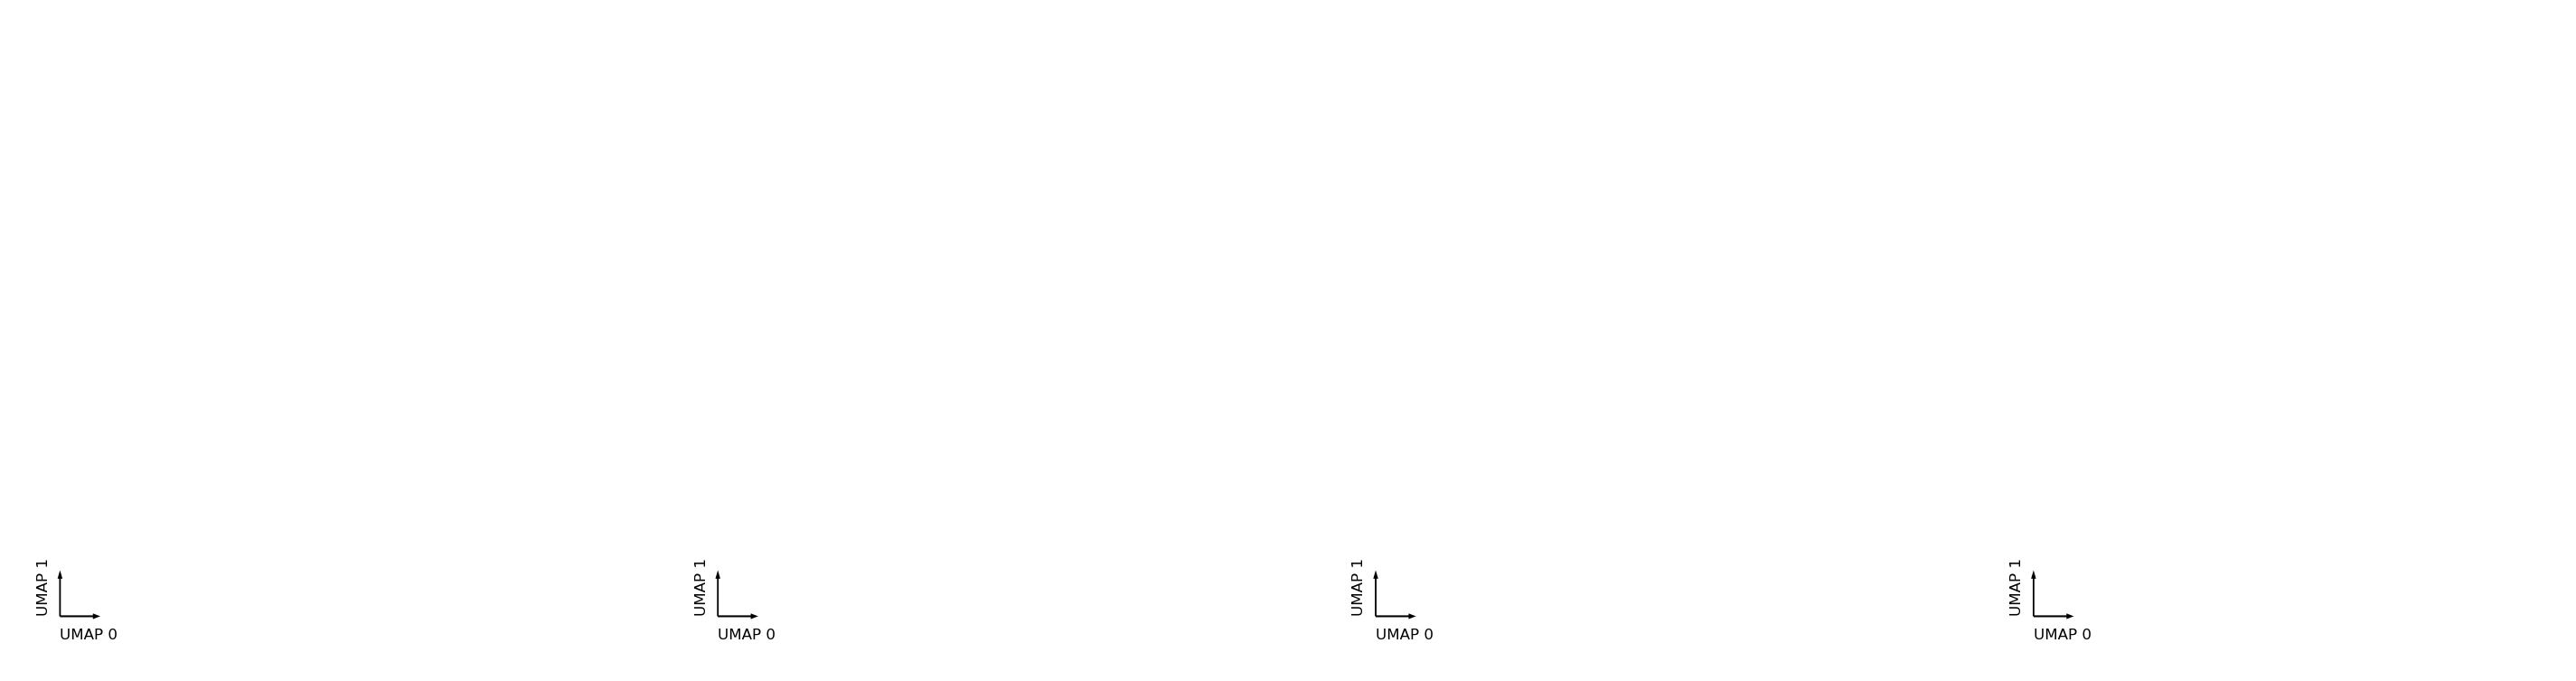

In [12]:
fig, axes = cc.plot_leiden_cases(coord_data=adata.obs, coord_base=coord_base)
#fig.savefig(f"05j_leiden_cases_plot_{var_dim}.png")


In [13]:
#merging stpes

len(set(cc._multi_leiden_clusters)), len(set(cc.label))

(2, 1)

In [14]:
cc.plot_steps(coord_data=adata.obs, coord_base=coord_base)

No merge step to plot


In [15]:


# Save the plot to a file
plt.savefig(f"05j_clustering_steps_plot_{var_dim}.png", dpi=300)  # Save as PNG with high resolution


<Figure size 640x480 with 0 Axes>

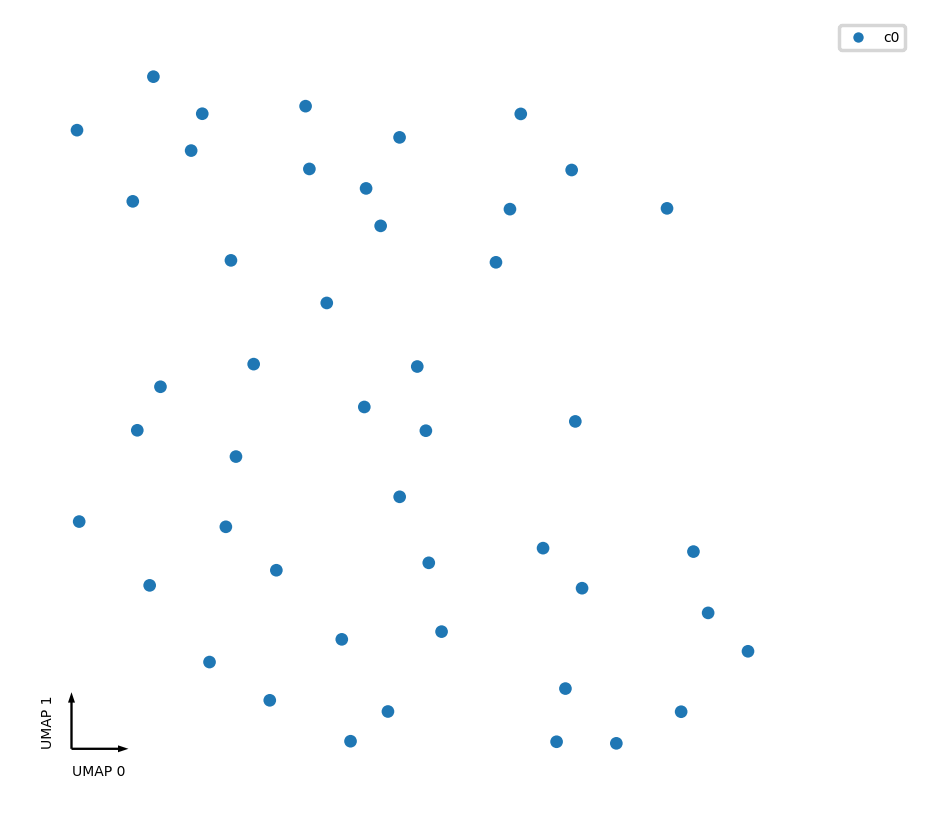

In [16]:


# Plot Final Clustering Results - Cluster Labels
adata.obs[clustering_name] = cc.label

# Save the clustering results
adata.obs[[clustering_name]].to_csv(f'{clustering_name}_clustering_labels.csv')

fig, ax = plt.subplots(figsize=(4, 4), dpi=250)
_ = categorical_scatter(data=adata, ax=ax, coord_base=coord_base, hue=clustering_name, show_legend=True)
fig.savefig(f"05j_final_clustering_labels_{var_dim}.png")


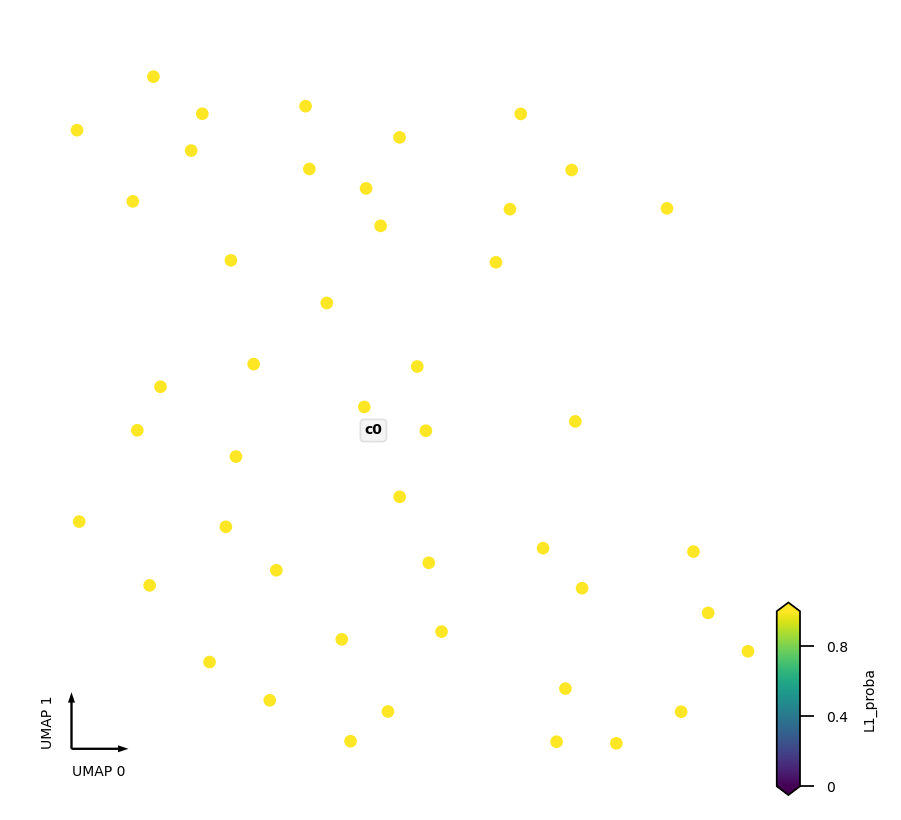

In [17]:
# Plot Final Clustering Results - Final prediction Probablity
adata.obs[clustering_name + '_proba'] = cc.label_proba

fig, ax = plt.subplots(figsize=(4, 4), dpi=250)
_ = continuous_scatter(data=adata,
                       ax=ax,
                       hue_norm=(0, 1),
                       hue=clustering_name + '_proba',
                        text_anno=clustering_name,
                       coord_base=coord_base)
fig.savefig(f"05j_final_prediction_probablity_{var_dim}.png")



/tmp/ipykernel_2277392/666678515.py:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=adata.obs,


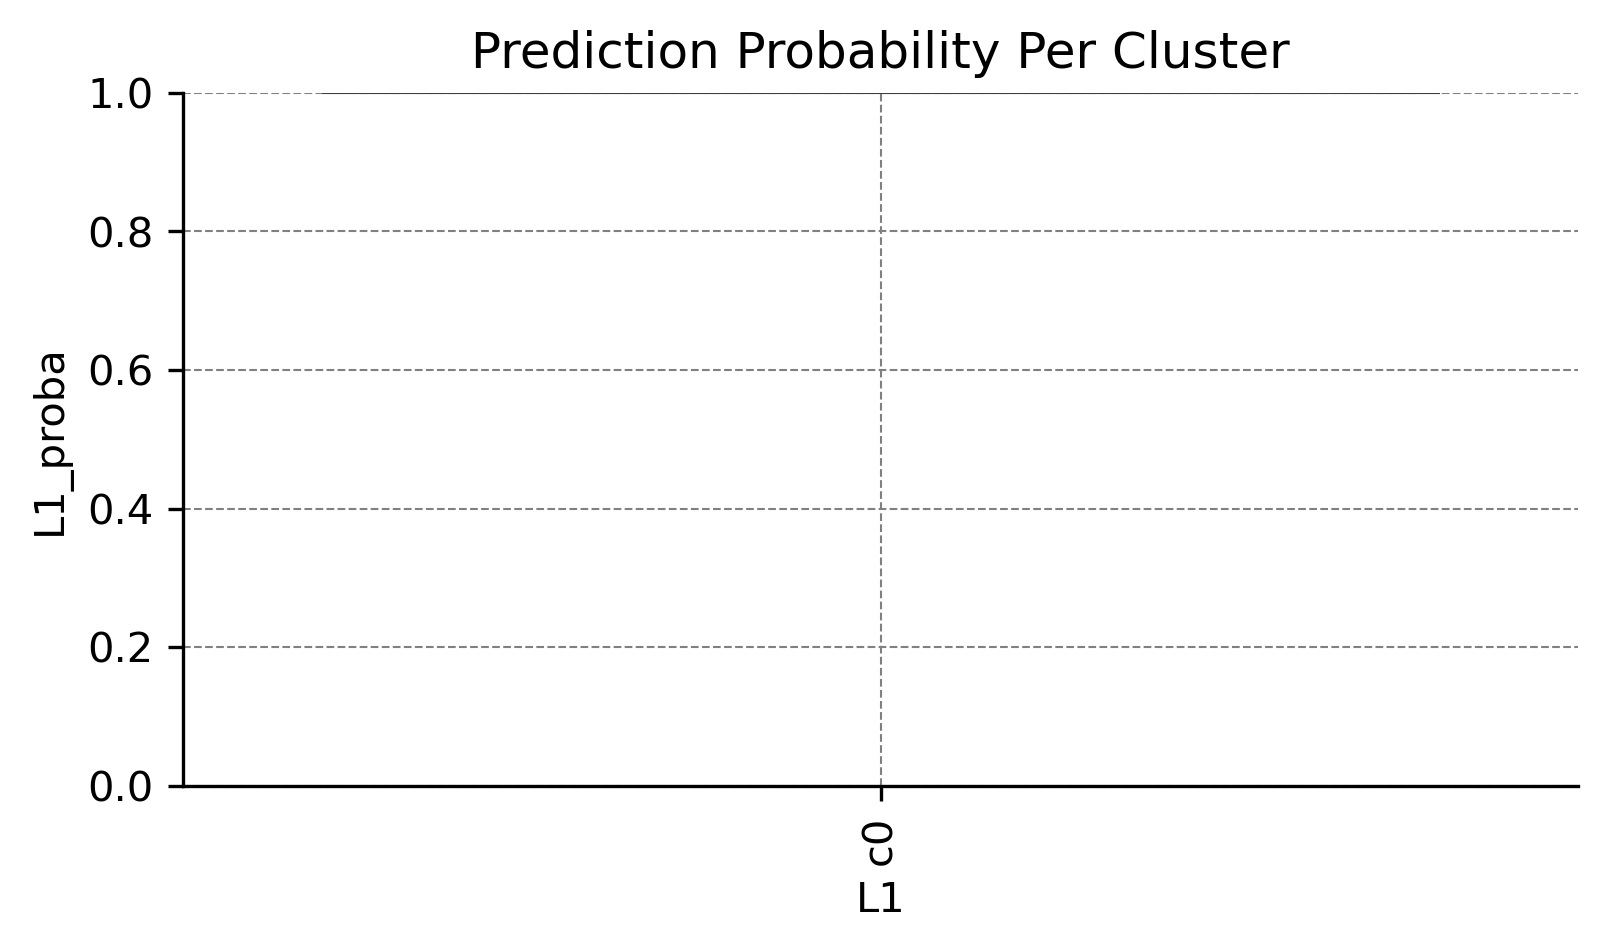

In [18]:
#Prediction probibility per cluster
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)

sns.violinplot(data=adata.obs,
               x=clustering_name,
               y=clustering_name + '_proba',
               scale='width',
               linewidth=0.5,
               cut=0,
               ax=ax)
ax.set(ylim=(0, 1), title='Prediction Probability Per Cluster')
ax.xaxis.set_tick_params(rotation=90)
ax.grid(linewidth=0.5, color='gray', linestyle='--')
sns.despine(ax=ax)

fig.savefig(f"05j_final_prediction_probablity_percluster_{var_dim}.png")



In [19]:
# using the cluster centroids in PC space to calculate dendrogram
pc_center = get_pc_centers(adata, group=clustering_name)

# calculate the cluster dendrogram using R package pvclust
dendro = Dendrogram(nboot=nboot,
                    method_dist=method_dist,
                    method_hclust=method_hclust,
                    n_jobs=n_jobs)
dendro.fit(pc_center)

ImportError: Got rpy2 import error, please make sure R, rpy2 and their dependencies are installed. If not, use conda or mamba to install rpy2

TypeError: 'NoneType' object is not subscriptable

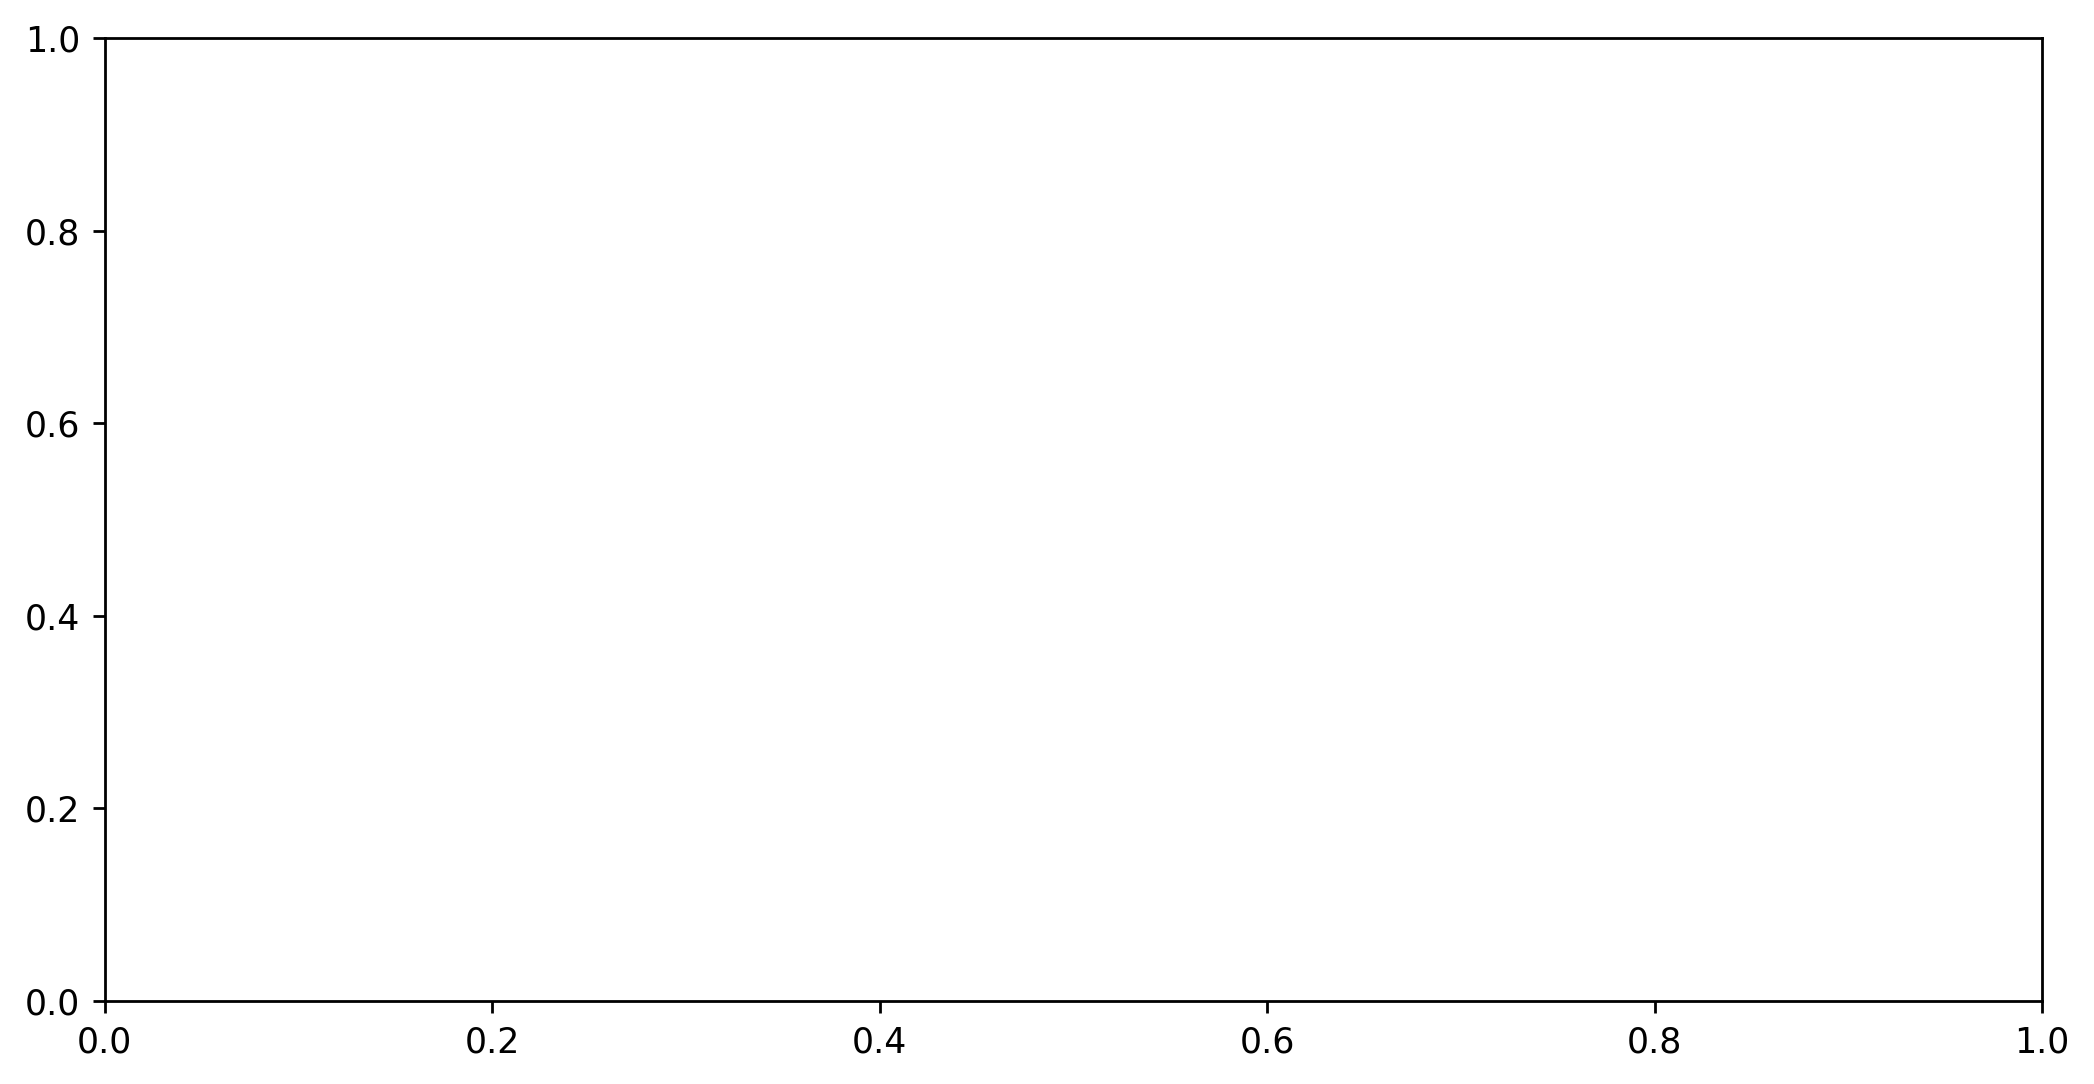

In [27]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=250)
_ = plot_dendrogram(dendro=dendro.dendrogram,
                    linkage_df=dendro.linkage,
                    ax=ax,
                    plot_non_singleton=False,
                    line_hue=dendro.edge_stats['au'], # au is the branch confidence score, see pvclust documentation
                    line_hue_norm=(0.5, 1))


In [ ]:
fig.savefig(f"05j_cluster_dendrogram_{var_dim}.png")


In [28]:
try:
    anno = pd.read_csv(
    '../../../data/Brain/snmC-seq2/HIP.Annotated.CellMetadata.csv.gz',
    index_col=0)
    adata.obs['CellTypeAnno'] = anno['MajorType']
    fig, axes = plt.subplots(figsize=(8, 4), dpi=250, ncols=2)
    ax = axes[0]
    _ = categorical_scatter(data=adata.obs,
                            ax=ax,
                            hue=clustering_name,
                            coord_base=coord_base,
                            palette='tab20',
                            text_anno=clustering_name,
                            show_legend=False)
    ax = axes[1]
    _ = categorical_scatter(data=adata.obs.dropna(subset=['CellTypeAnno']),
                            ax=ax,
                            hue='CellTypeAnno',
                            coord_base=coord_base,
                            palette='tab20',
                            text_anno='CellTypeAnno',
                            show_legend=False)
except BaseException:
    pass

In [ ]:
sc.pl.umap(adata, color='L1', title='UMAP with Clusters')
plt.savefig('05j_umap_withlabeledclustert.png', dpi=300, bbox_inches='tight')

In [ ]:
adata

                        Group AnimalID  Year Collection
cell                                                   
4146045001PO3NC4G4C   Control    41460  2023          2
4129944963PO2NC4M1S  Stressed    41299  2023          1
4520844650PO1NC5A7S  Stressed    45208  2022          1
4146045001PO2NC3F4C   Control    41460  2023          2
4520844650PO2NC3B7S  Stressed    45208  2022          1


/quobyte/lasallegrp/Ensi/conda_environments/allcools/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


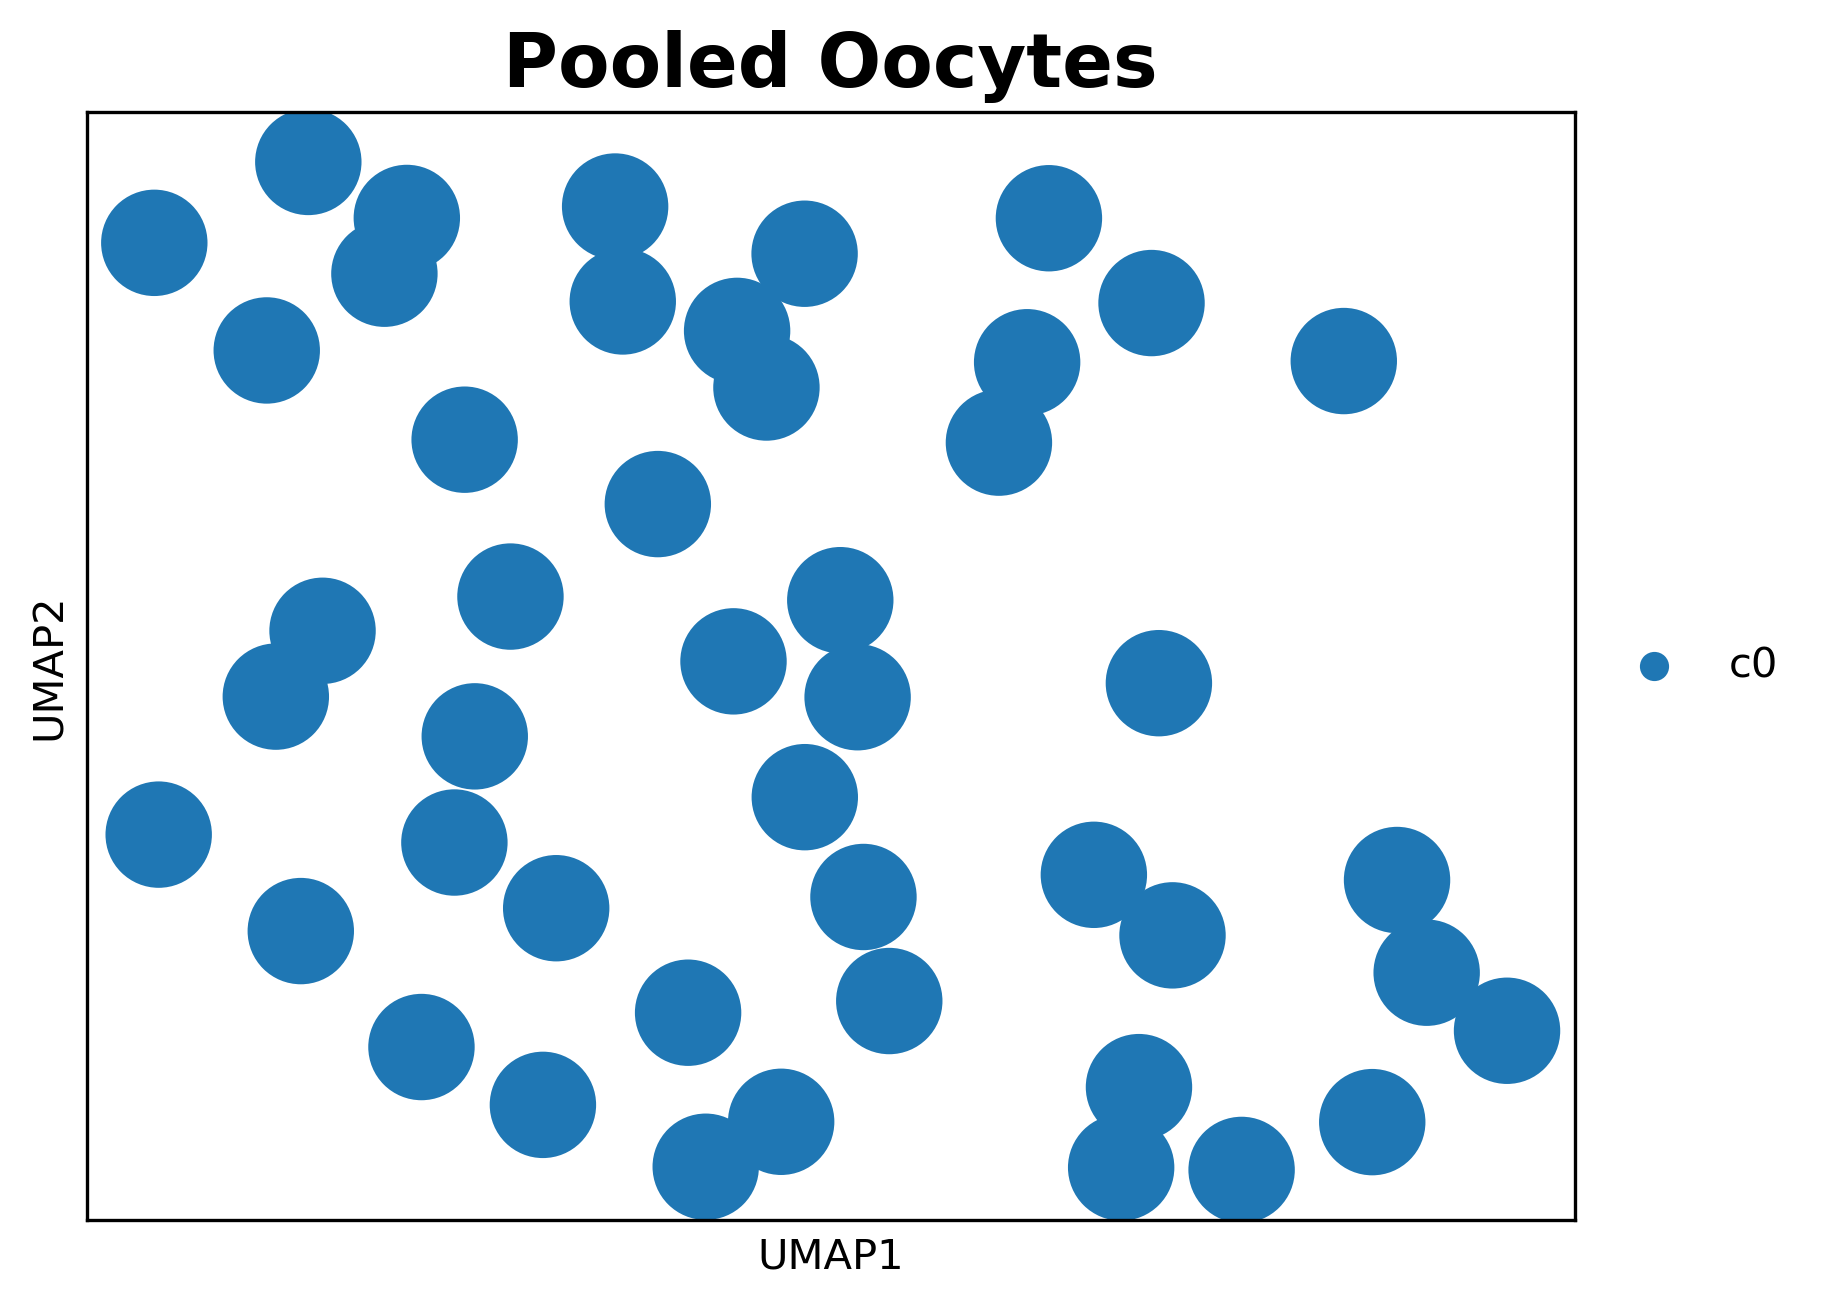

In [30]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['savefig.transparent'] = True
matplotlib.rcParams['path.simplify'] = False  # keep exact vectors

# Load metadata
metadata_path = '../../CellMetadata_PassQC_alloocytes_withyear_mtreads_sub.csv'
metadata = pd.read_csv(metadata_path, index_col=0, sep="\t")

# Add Group and AnimalID to adata.obs
adata.obs['Group'] = metadata['Group']
adata.obs['AnimalID'] = metadata['AnimalID'].astype('category')
adata.obs['Year'] = metadata['Year'].astype('category')
adata.obs['TotalRead'] = metadata['TotalRead']
adata.obs['mCGFrac'] = metadata['mCGFrac']
adata.obs['leiden'] = adata.obs['leiden']
adata.obs['Collection'] = metadata['Collection'].astype('category')
adata.obs["MT.Fraction"] = metadata["MT.Fraction"]
adata.obs["Type"] = metadata["Type"]

# Verify addition
print(adata.obs[['Group', 'AnimalID', 'Year', 'Collection']].head())

# Plot the UMAP with the original clustering labels (assuming 'leiden' or another clustering label is present)
sc.pl.umap(adata, color="L1", title='UMAP with Clusters', show=False)
#plt.savefig('05j_umap_withlabeledclustert_pooled_fig1.pdf', dpi=300, bbox_inches='tight')
ax = plt.gca()
ax.set_title("Pooled Oocytes", fontsize=18, fontweight="bold", rasterized=False)
#plt.savefig('panelE_pooled.pdf', dpi=300, bbox_inches='tight')
plt.savefig("panelFa_pooled.pdf", format='pdf', bbox_inches='tight')
# Plot the UMAP with metadata labels
#sc.pl.umap(adata, color=['Group', 'AnimalID', 'Year', 'Collection', 'Type'])

# Save the plot with metadata labels
#plt.savefig('panelDS.pdf', dpi=300, bbox_inches='tight')

In [25]:
cc.save(f'05j_.{clustering_name}.ConcensusClustering.model.lib')
dendro.save(f'05j_.{clustering_name}.Dendrogram.lib')
#adata.write_h5ad(adata_path)


In [26]:
sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon")
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=4)

NameError: name 'pbmc' is not defined

In [27]:
adata.write('adata.with_coords_final_pooled.h5ad')